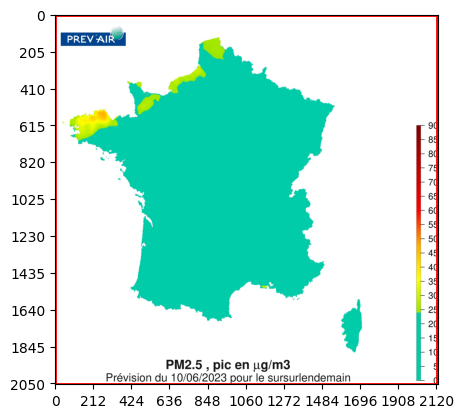

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers l'image JPG
image_path = r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg'

# Charger l'image
image = plt.imread(image_path)

# Dimensions de l'image
height, width, _ = image.shape

# Créer une nouvelle figure
fig, ax = plt.subplots()

# Afficher l'image avec la boîte englobante
ax.imshow(image)

# Coordonnées de la boîte englobante
left = 0  # Coin supérieur gauche
top = 0
right = width - 1  # Coin inférieur droit
bottom = height - 1

# Dessiner la boîte englobante
rect = plt.Rectangle((left, top), right - left, bottom - top, edgecolor='red', linewidth=2, fill=False)
ax.add_patch(rect)

# Calculer le pas des graduations en fonction de la taille de l'image
x_tick_step = max(1, int(width / 10))
y_tick_step = max(1, int(height / 10))

# Configurer les graduations des axes
x_ticks = np.arange(left, right + 1, x_tick_step)
y_ticks = np.arange(top, bottom + 1, y_tick_step)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Afficher le graphique
plt.show()


TypeError: Invalid shape (3, 2055, 2127) for image data

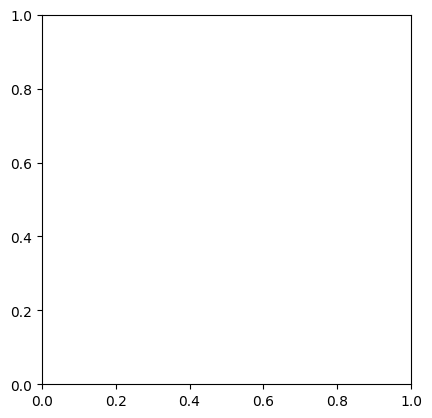

In [67]:
import rasterio
import matplotlib.pyplot as plt

# Chemin vers le fichier TIFF
tif_path = r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.tif'

# Ouvrir le fichier TIFF avec rasterio
with rasterio.open(tif_path) as src:
    # Lire l'image à partir du fichier TIFF
    image = src.read()

# Afficher l'image avec matplotlib
plt.imshow(image)
plt.axis('off')  # Désactiver les axes
plt.show()

In [64]:
import geopandas as gpd
from PIL import Image
import matplotlib.pyplot as plt

# Chemins d'accès au GeoJSON de la France et à l'image JPG
geojson_path = r"D:\ESGI\projet4iabd\image\maxj\test\test.geojson"
image_path = r"D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg"

# Charger le GeoJSON en tant que GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Ouvrir l'image JPG
image = Image.open(image_path)

image.plot()



AttributeError: plot

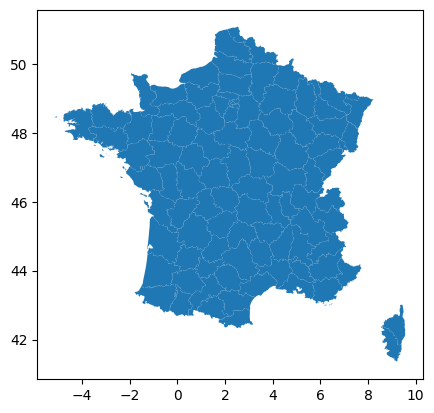

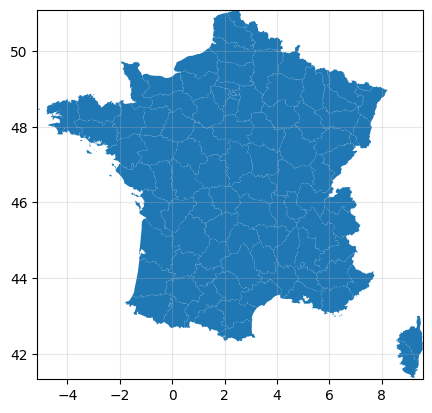

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Chemins d'accès au GeoJSON de la France et à l'image JPG
geojson_path = r"D:\ESGI\projet4iabd\image\maxj\test\test.geojson"
image_path = r"D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg"

# Charger le GeoJSON en tant que GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Tracer les entités géographiques
gdf.plot()

# Obtenir les limites géographiques (boîte englobante)
bounds = gdf.total_bounds

# Créer le graphique
fig, ax = plt.subplots()

# Tracer les entités géographiques sur l'axe du graphique
gdf.plot(ax=ax)

# Définir les limites de l'axe du graphique en utilisant les limites géographiques
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Activer la grille avec une transparence de 0.3
ax.grid(True, alpha=0.3)

# Afficher le graphique
plt.show()


In [24]:
from PIL import Image, ImageDraw
import os 
import rasterio

# Chemin vers l'image JPG avec la boîte englobante
image_path = r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg'

# Charger l'image
image = Image.open(image_path)

# Créer un objet Draw pour dessiner sur l'image
draw = ImageDraw.Draw(image)

# Coordonnées de la boîte englobante
left = 40 # Côté gauche
top = 126  # Haut
right = 1705  # Côté droit
bottom = 1882  # Bas

# Dessiner la boîte englobante sur l'image
draw.rectangle([(left, top), (right, bottom)], outline='red', width=2)

# Enregistrer l'image modifiée temporairement au format TIFF
temp_tiff_path = r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.temp.tif'
image.save(temp_tiff_path, format='TIFF')

# Ouvrir l'image temporaire avec rasterio
with rasterio.open(temp_tiff_path) as src:
    # Copier les métadonnées de l'image source
    profile = src.profile

    # Créer une nouvelle image TIFF avec la boîte englobante
    output_tiff_path = r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.tif'
    with rasterio.open(output_tiff_path, 'w', **profile) as dst:
        # Copier les données de l'image source dans la nouvelle image TIFF
        dst.write(src.read())

# Supprimer l'image temporaire
os.remove(temp_tiff_path)# Ouvrir le fichier TIFF avec rasterio
with rasterio.open(tif_path) as src:
    # Lire l'image à partir du fichier TIFF
    image = src.read()


In [38]:
from PIL import Image, ImageDraw, ImageFont

# Ouvrir l'image
image = Image.open(r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg')

# Créer un objet "ImageDraw" pour dessiner sur l'image
draw = ImageDraw.Draw(image)

# Résolution spatiale de l'image (en degrés par pixel)
resolution = 0.0001

# Coordonnées géographiques du coin supérieur gauche de la bbox
lat_sup_gauche = 48.8594
lon_sup_gauche = 2.2945

# Largeur et hauteur de la bbox en pixels
largeur_bbox = 200
hauteur_bbox = 150

# Calculer les coordonnées géographiques de chaque coin de la bbox
lat_inf_gauche = lat_sup_gauche + hauteur_bbox * resolution
lon_inf_gauche = lon_sup_gauche
lat_inf_droit = lat_sup_gauche + hauteur_bbox * resolution
lon_inf_droit = lon_sup_gauche + largeur_bbox * resolution

# Dessiner la bbox sur l'image
bbox_coords = [(lon_sup_gauche, lat_sup_gauche), (lon_inf_droit, lat_inf_droit)]
draw.rectangle(bbox_coords, outline=(255, 0, 0), width=2)

# Coordonnées géographiques à l'intérieur de la bbox
lat_interieur = lat_sup_gauche + hauteur_bbox * 0.5 * resolution
lon_interieur = lon_sup_gauche + largeur_bbox * 0.5 * resolution

# Convertir les coordonnées en chaîne de caractères
coords_interieur = f"Lat: {lat_interieur}, Lon: {lon_interieur}"

# Définir les tailles de police à tester
font_sizes = [10, 12, 14, 16, 18, 20]

# Parcourir les tailles de police et dessiner le texte avec chaque taille
for font_size in font_sizes:
    # Charger la police par défaut avec la taille spécifiée
    font = ImageFont.truetype("arial.ttf", size=font_size)
    
    # Dessiner le texte sur l'image
    draw.text((10, 10), coords_interieur, fill=(255, 0, 0), font=font)

# Enregistrer l'image modifiée
image.save(r'D:\ESGI\projet4iabd\image\maxj\test\PREVAIR.prevision.20230610.MAXJ3.PM25.public.jpg')
